# Overview
Use this notebook to convert an OCT image to virtual histology.

To get started,
[open this notebook in colab](https://colab.research.google.com/github/WinetraubLab/zero_shot_segmentation/blob/main/point_based_segmentation.ipynb) and run.


## Set Up Environment

In [24]:

image_directory = '/Users/dannybarash/Downloads/TestSet/'

In [25]:
#segment anything (sam)
using_colab = True
visualize_sam_outputs = True

#sam algorithm input parameters
points_per_side=32
pred_iou_thresh=0.90
stability_score_thresh=0.95
crop_n_layers=1
crop_n_points_downscale_factor=2
min_mask_region_area=3000

#sam model type and weights checkpoint
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

In [26]:
#rf - roboflow dataset related params
rf_api_key="R04BinsZcBZ6PsfKR2fP"
rf_workspace="yolab-kmmfx"
rf_project = "connect_from_colab"
rf_dataset = "png-mask-semantic"

In [27]:
import torch
import torchvision
from segment_anything import sam_model_registry, SamPredictor


DEVICE = torch.device('mps')
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = "/Users/dannybarash/Code/oct/zero_shot_segmentation_test_sam/weights/sam_vit_h_4b8939.pth"  # os.path.join("weights", "sam_vit_h_4b8939.pth")

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
predictor = SamPredictor(sam)

In [28]:
import sys
sys.path.append('./OCT2Hist_UseModel')

In [29]:
from OCT2Hist_UseModel import oct2hist
from OCT2Hist_UseModel.utils.show_images import *
# Set up the network environment
oct2hist.setup_network()

Folder '/Users/dannybarash/Code/oct/zero_shot_segmentation_test_sam/OCT2Hist_UseModel/pytorch_CycleGAN_and_pix2pix//checkpoints/' already exists.
Folder '/Users/dannybarash/Code/oct/zero_shot_segmentation_test_sam/OCT2Hist_UseModel/pytorch_CycleGAN_and_pix2pix//checkpoints/oct2hist/' already exists.


In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils.crop import crop


In [31]:
import random
import os
# List all files in the directory
all_images = os.listdir(image_directory)

# Filter out images without the suffix _realB
filtered_images = [img for img in all_images if "real_A" in img]
random.shuffle(filtered_images)
filtered_images = filtered_images[:10]

# Uncomment this part if you would like to try a single image rather than all.
#filtered_images = [''] # for one good example: ['LG-37-Slide06_Section02_yp0_patch01_real_A.png']

[[   0  174]
 [ 102  155]
 [ 204  128]
 [ 306  102]
 [ 409   94]
 [ 511   69]
 [ 613   62]
 [ 716   60]
 [ 818   29]
 [ 920    0]
 [1023    0]
 [   0  214]
 [ 102  195]
 [ 204  168]
 [ 306  142]
 [ 409  134]
 [ 511  109]
 [ 613  102]
 [ 716  100]
 [ 818   69]
 [ 920   40]
 [1023   40]
 [   0  361]
 [ 102  329]
 [ 204  309]
 [ 306  298]
 [ 409  303]
 [ 511  276]
 [ 613  263]
 [ 716  215]
 [ 818  194]
 [ 920  175]
 [1023  152]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


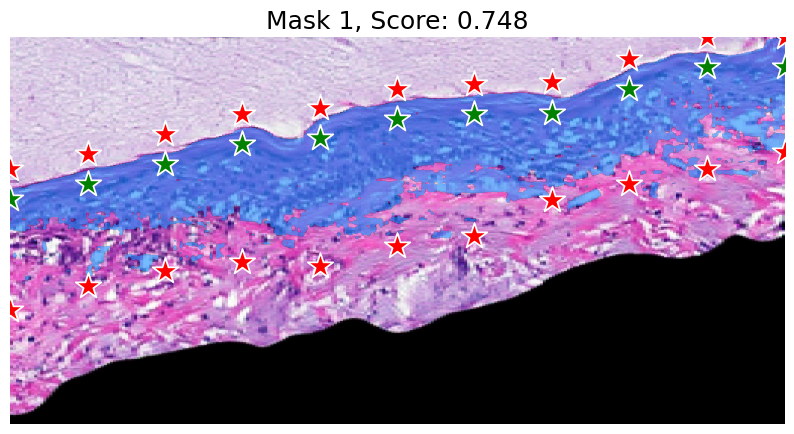

Image LG-39-Slide06_Section03_yp0_patch01_real_A.png ready.
[[   0  204]
 [ 102  197]
 [ 204  186]
 [ 306  163]
 [ 409  147]
 [ 511  110]
 [ 613  100]
 [ 716   96]
 [ 818   97]
 [ 920  102]
 [1023  104]
 [   0  244]
 [ 102  237]
 [ 204  226]
 [ 306  203]
 [ 409  187]
 [ 511  150]
 [ 613  140]
 [ 716  136]
 [ 818  137]
 [ 920  142]
 [1023  144]
 [   0  322]
 [ 102  313]
 [ 204  293]
 [ 306  285]
 [ 409  263]
 [ 511  237]
 [ 613  213]
 [ 716  213]
 [ 818  236]
 [ 920  247]
 [1023  247]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


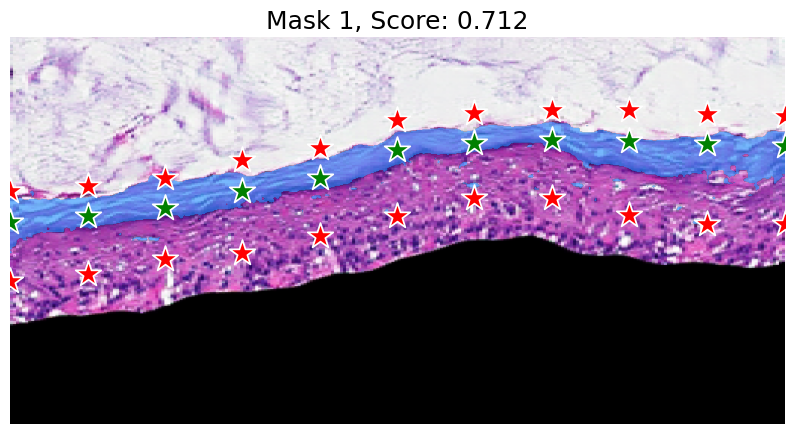

Image LD-11-Slide08_Section01_yp0_patch01_real_A.png ready.
[[   0   89]
 [ 102   63]
 [ 204   72]
 [ 306  119]
 [ 409   81]
 [ 511   29]
 [ 613   42]
 [ 716   38]
 [ 818   56]
 [ 920   59]
 [1023   54]
 [   0  129]
 [ 102  103]
 [ 204  112]
 [ 306  159]
 [ 409  121]
 [ 511   69]
 [ 613   82]
 [ 716   78]
 [ 818   96]
 [ 920   99]
 [1023   94]
 [   0  183]
 [ 102  158]
 [ 204  187]
 [ 306  216]
 [ 409  222]
 [ 511  193]
 [ 613  177]
 [ 716  173]
 [ 818  176]
 [ 920  149]
 [1023  162]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


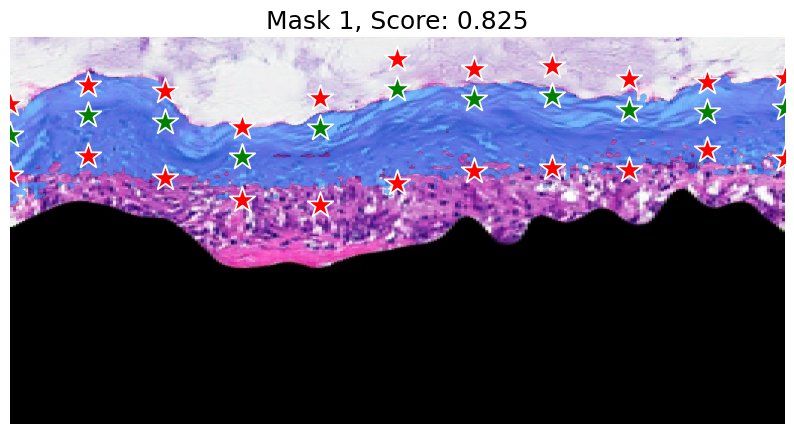

Image LG-02-Slide08_Section02_yp0_patch01_real_A.png ready.
[[   0   42]
 [ 102   41]
 [ 204   36]
 [ 306   39]
 [ 409   46]
 [ 511   58]
 [ 613   79]
 [ 716   91]
 [ 818  143]
 [ 920  105]
 [1023  115]
 [   0   82]
 [ 102   81]
 [ 204   76]
 [ 306   79]
 [ 409   86]
 [ 511   98]
 [ 613  119]
 [ 716  131]
 [ 818  183]
 [ 920  145]
 [1023  155]
 [   0  219]
 [ 102  215]
 [ 204  217]
 [ 306  207]
 [ 409  257]
 [ 511  253]
 [ 613  245]
 [ 716  265]
 [ 818  317]
 [ 920  252]
 [1023  260]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


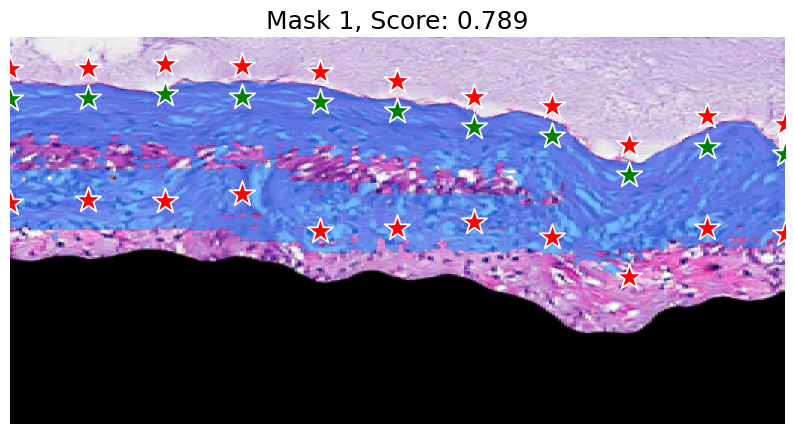

Image LG-37-Slide06_Section02_yp0_patch01_real_A.png ready.
[[   0   46]
 [ 102   76]
 [ 204   65]
 [ 306  135]
 [ 409   82]
 [ 511   94]
 [ 613   92]
 [ 716   33]
 [ 818    0]
 [ 920    0]
 [1023   34]
 [   0   86]
 [ 102  116]
 [ 204  105]
 [ 306  175]
 [ 409  122]
 [ 511  134]
 [ 613  132]
 [ 716   73]
 [ 818   40]
 [ 920   40]
 [1023   74]
 [   0  186]
 [ 102  191]
 [ 204  208]
 [ 306  244]
 [ 409  208]
 [ 511  230]
 [ 613  202]
 [ 716  187]
 [ 818  151]
 [ 920  138]
 [1023  152]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


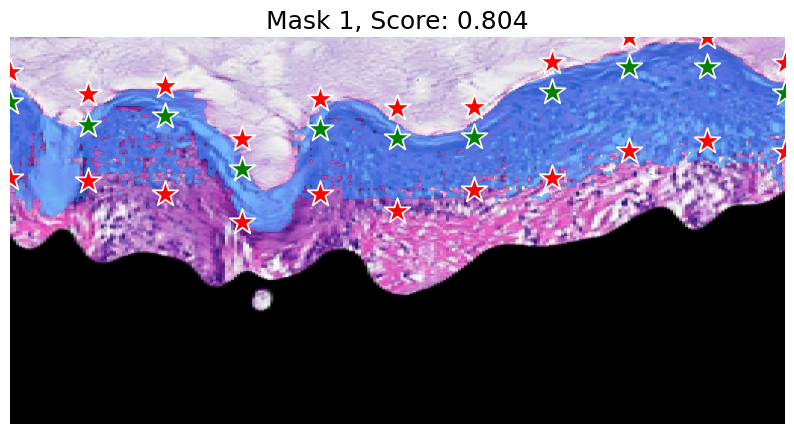

Image LG-27-Slide11_Section01_yp0_patch01_real_A.png ready.
[[   0  149]
 [ 102  135]
 [ 204  101]
 [ 306   92]
 [ 409   86]
 [ 511   72]
 [ 613   59]
 [ 716   57]
 [ 818   41]
 [ 920    0]
 [1023    0]
 [   0  189]
 [ 102  175]
 [ 204  141]
 [ 306  132]
 [ 409  126]
 [ 511  112]
 [ 613   99]
 [ 716   97]
 [ 818   81]
 [ 920   40]
 [1023   40]
 [   0  338]
 [ 102  314]
 [ 204  271]
 [ 306  239]
 [ 409  245]
 [ 511  231]
 [ 613  206]
 [ 716  218]
 [ 818  184]
 [ 920  145]
 [1023  143]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


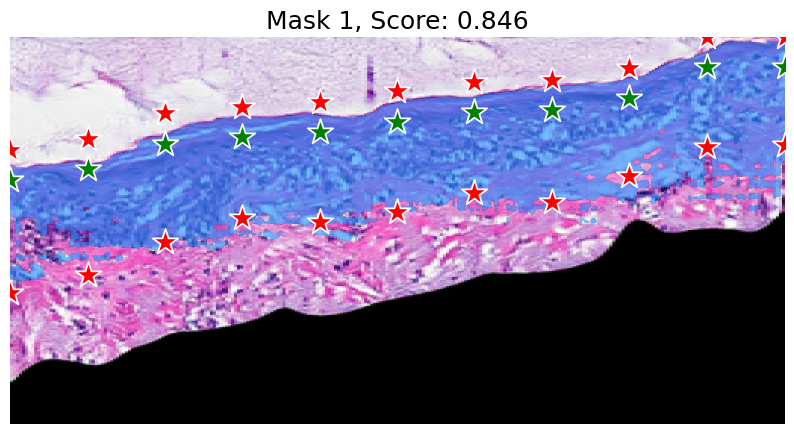

Image LG-39-Slide06_Section01_yp0_patch01_real_A.png ready.
[[142  42]
 [164  28]
 [187  17]
 [209   0]
 [555   0]
 [577   0]
 [600   0]
 [622   0]
 [645   0]
 [667   0]
 [690   0]
 [142  82]
 [164  68]
 [187  57]
 [209  40]
 [555  40]
 [577  40]
 [600  40]
 [622  40]
 [645  40]
 [667  40]
 [690  40]
 [142  83]
 [164  79]
 [187  69]
 [209  52]
 [555  41]
 [577  44]
 [600  44]
 [622  43]
 [645  43]
 [667  43]
 [690  41]] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] (512, 1024, 3)


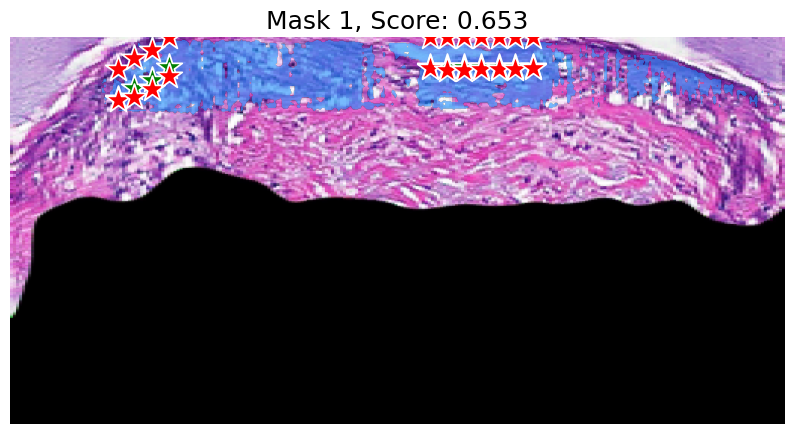

Image LG-25-Slide04_Section01_yp0_patch01_real_A.png ready.


In [32]:
# -*- coding: utf-8 -*-
"""run_oct2hist.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/github/WinetraubLab/OCT2Hist-ModelInference/blob/main/run_oct2hist.ipynb

# Overview
Use this notebook to convert an OCT image to virtual histology.

To get started,
[open this notebook in colab](https://colab.research.google.com/github/WinetraubLab/OCT2Hist-ModelInference/blob/main/run_oct2hist.ipynb) and run.
"""

import random
import sys
from OCT2Hist_UseModel.utils.show_images import showImg

import torch
from segment_anything import sam_model_registry, SamPredictor

from OCT2Hist_UseModel.utils.masking import get_sam_input_points, show_points, show_mask, mask_gel_and_low_signal

# from google.colab import drive

import cv2
import matplotlib.pyplot as plt

import os

for filename in filtered_images:
    oct_input_image_path = os.path.join(image_directory, filename)
    # Load OCT image
    oct_image = cv2.imread(oct_input_image_path)
    oct_image = cv2.cvtColor(oct_image, cv2.COLOR_BGR2RGB)
    #is it sheered?
    right_column = oct_image.shape[1]-1
    if (oct_image[:,0,0] == 0).all() or (oct_image[:,right_column,0] == 0).all():
        continue
    # OCT image's pixel size
    microns_per_pixel_z = 1
    microns_per_pixel_x = 1

    # no need to crop - the current folder contains pre cropped images.
    # cropped = crop_oct(oct_image)

    #workaround: for some reason the images look close to the target shape, but not exactly.
    oct_image = cv2.resize(oct_image, [1024, 512], interpolation=cv2.INTER_AREA)

    #for good input points, we need the gel masked out.
    masked_gel_image = mask_gel_and_low_signal(oct_image)

    # run vh&e
    virtual_histology_image, _, o2h_input = oct2hist.run_network(oct_image,
                                                                                             microns_per_pixel_x=microns_per_pixel_x,
                                                                                             microns_per_pixel_z=microns_per_pixel_z)
    # mask
    input_point, input_label = get_sam_input_points(masked_gel_image, virtual_histology_image)

    predictor.set_image(virtual_histology_image)
    masks, scores, logits = predictor.predict(point_coords=input_point, point_labels=input_label,
                                              multimask_output=False, )

    print(input_point, input_label, virtual_histology_image.shape)
    for i, (mask, score) in enumerate(zip(masks, scores)):
        plt.figure(figsize=(10, 10))
        plt.imshow(virtual_histology_image)
        show_mask(mask, plt.gca())
        show_points(input_point, input_label, plt.gca())
        plt.title(f"Mask {i + 1}, Score: {score:.3f}", fontsize=18)
        plt.axis('off')
        plt.show()
    print(f"Image {filename} ready.")
